In [1]:
import pandas as pd
import os

df_covs = pd.read_csv('processed_data/paul_covariates.csv')
df_covs.rename({'GEOID':'Fips'}, axis=1, inplace=True)
df_covs

,Fips,POP_x,POP_M,POP_F,POP_A0004,POP_A0509,POP_A1014,POP_A1517,POP_A1819,POP_A20,...,GQ_F65p_INST,GQ_F65p_INST_COR,GQ_F65p_INST_JUV,GQ_F65p_INST_NUR,GQ_F65p_INST_OTH,GQ_F65p_NONI,GQ_F65p_NONI_UNI,GQ_F65p_NONI_MIL,GQ_F65p_NONI_OTH,Population
0,37001,169185,80687,88498,9733,10441,10964,6617,6695,2813,...,405,0,0,398,7,131,0,0,131,171415
1,37003,36491,18568,17923,1600,1691,2675,1424,696,377,...,66,0,0,66,0,9,0,0,9,36444
2,37005,10910,5372,5538,454,595,473,342,197,88,...,29,1,0,28,0,0,0,0,0,10888
3,37007,22388,11299,11089,1122,1153,1536,810,538,225,...,132,13,0,119,0,3,0,0,3,22055
4,37009,26598,13095,13503,1066,1182,1508,869,521,281,...,162,0,0,162,0,5,0,0,5,26577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37191,117692,57965,59727,7572,7298,8513,4774,2778,2131,...,341,3,0,198,140,92,0,0,92,117333
96,37193,66335,33111,33224,3278,3528,4077,2659,1402,1004,...,319,0,0,319,0,6,0,0,6,65969
97,37195,78844,37482,41362,4679,4726,5581,3276,2196,1081,...,331,0,0,331,0,3,0,0,3,78784
98,37197,37198,18636,18562,1837,1901,2629,1443,661,406,...,150,0,0,150,0,3,0,0,3,37214


In [2]:
df_deaths = pd.read_csv('processed_data/naive_county_deaths.csv')
df_deaths.drop(['Date','County','Pop'], axis=1, inplace=True)
df_deaths

,Fips,True_county_deaths,Pop_ratio,Pred_state_deaths,Naive_county_deaths
0,37001,178,0.016162,9846,159.131602
1,37003,59,0.003575,9846,35.201421
2,37005,4,0.001062,9846,10.455189
3,37007,45,0.002331,9846,22.949408
4,37009,36,0.002594,9846,25.537623
...,...,...,...,...,...
3895,37191,332,0.011740,19285,226.407544
3896,37193,198,0.006523,19285,125.792797
3897,37195,243,0.007799,19285,150.411866
3898,37197,82,0.003591,19285,69.260324


In [3]:
df = df_deaths.merge(df_covs, on='Fips')
df

,Fips,True_county_deaths,Pop_ratio,Pred_state_deaths,Naive_county_deaths,POP_x,POP_M,POP_F,POP_A0004,POP_A0509,...,GQ_F65p_INST,GQ_F65p_INST_COR,GQ_F65p_INST_JUV,GQ_F65p_INST_NUR,GQ_F65p_INST_OTH,GQ_F65p_NONI,GQ_F65p_NONI_UNI,GQ_F65p_NONI_MIL,GQ_F65p_NONI_OTH,Population
0,37001,178,0.016162,9846,159.131602,169185,80687,88498,9733,10441,...,405,0,0,398,7,131,0,0,131,171415
1,37001,203,0.016162,10485,169.459156,169185,80687,88498,9733,10441,...,405,0,0,398,7,131,0,0,131,171415
2,37001,217,0.016162,11231,181.516050,169185,80687,88498,9733,10441,...,405,0,0,398,7,131,0,0,131,171415
3,37001,223,0.016162,11285,182.388801,169185,80687,88498,9733,10441,...,405,0,0,398,7,131,0,0,131,171415
4,37001,230,0.016162,11494,185.766671,169185,80687,88498,9733,10441,...,405,0,0,398,7,131,0,0,131,171415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,37199,35,0.001723,18733,32.273443,18357,9079,9278,842,937,...,41,0,0,41,0,0,0,0,0,18470
3896,37199,35,0.001723,18813,32.411268,18357,9079,9278,842,937,...,41,0,0,41,0,0,0,0,0,18470
3897,37199,36,0.001723,18980,32.698977,18357,9079,9278,842,937,...,41,0,0,41,0,0,0,0,0,18470
3898,37199,36,0.001723,19116,32.933280,18357,9079,9278,842,937,...,41,0,0,41,0,0,0,0,0,18470


In [85]:
from sklearn.model_selection import train_test_split

# X = df.drop(['Fips','True_county_deaths'],axis=1)
# y = df['True_county_deaths'].values

df_train, df_test = train_test_split(df, test_size=0.2, random_state=666)

target = 'True_county_deaths'

covs_to_drop = [target,
                'Fips',
#                 'Naive_county_deaths',
#                 'Pred_state_deaths'
               ]

X_train = df_train.drop(covs_to_drop,axis=1)
y_train = df_train[target].values

X_test = df_test.drop(covs_to_drop,axis=1)
y_test = df_test[target].values

y_naive = df_test['Naive_county_deaths'].values

print(len(X_train), len(X_test))


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=666)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) #[:,None]
y_prob = clf.predict_proba(X_test)[:,0]

# y_naive = X_test['Naive_county_deaths'].values

# print(y_test[:10])
# print(y_pred[:10])
# print(y_naive[:10])



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for pred in [y_naive, y_pred]:
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(mae, mse, r2)

3120 780
53.34972635868697 10512.584118965191 0.672205198071111
2.6628205128205127 34.503846153846155 0.9989241292827916


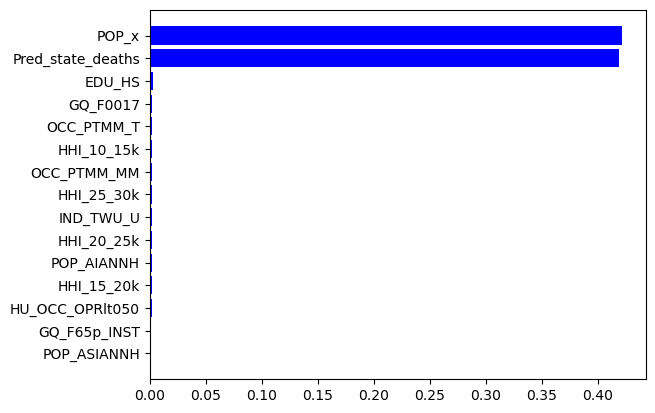

IndexError: index 193 is out of bounds for axis 0 with size 193

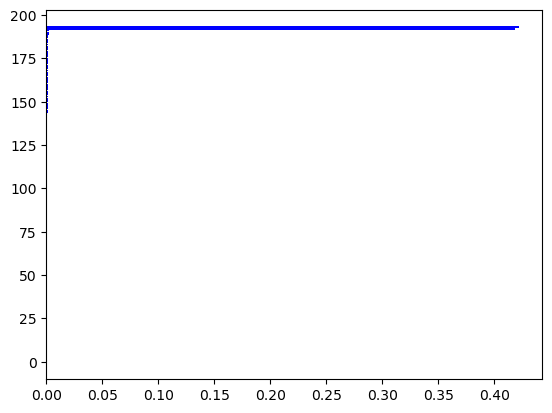

In [86]:
import matplotlib.pyplot as plt
import numpy as np

feats = X.columns.values
importances = clf.feature_importances_

indices = np.argsort(importances)[-15:]
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feats[i] for i in indices])
plt.show()

indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feats[i] for i in indices])
plt.show()

In [75]:
# from sklearn.model_selection import train_test_split

# X = df.drop(['Fips','True_county_deaths'],axis=1)
# y = df['True_county_deaths'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# print(len(X_train), len(X_test))



# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=666)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test) #[:,None]
# y_prob = clf.predict_proba(X_test)[:,0]

# y_naive = X_test['Naive_county_deaths'].values

# # print(y_test[:10])
# # print(y_pred[:10])
# # print(y_naive[:10])



# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for pred in [y_naive, y_pred]:
#     mae = mean_absolute_error(y_test, pred)
#     mse = mean_squared_error(y_test, pred)
#     r2 = r2_score(y_test, pred)
#     print(mae, mse, r2)